# Haptic Learning : inferencing human features using deep networks

This python notebook is for explanation of the core concepts used and the models developed for this webinar.

## Acknowledgement

I would like to extend my gratitude towards PyData, Pune team for giving me this opportunity to showcase my findings 

## Akshay Bahadur

    * Software engineer, Symantec.
    * ML Researcher
    * Software Innovator, Intel
    
### Contact

   * [Portfolio](https://www.akshaybahadur.com/)
   * [LinkedIN](https://www.linkedin.com/in/akshaybahadur21/)
   * [GitHub](https://github.com/akshaybahadur21)
  



## Tania's story

In [0]:

%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/Oc_QMQ4QHcw"></iframe>

## MNIST Digit Recognition

## Showing content using Webcam

In [0]:


from keras import Sequential
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Dropout
from keras.utils import np_utils, print_summary
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def showData(x, label):
    pixels = np.array(x, dtype='uint8')

    pixels = pixels.reshape((28, 28))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

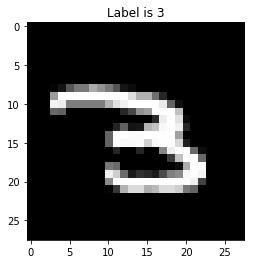

In [0]:
showData(x_train[250], y_train[250])

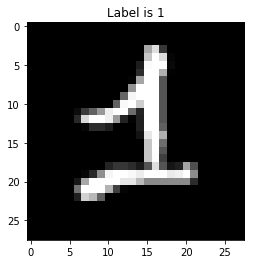

In [0]:
showData(x_train[24], y_train[24])

In [0]:
x_train_norm= x_train / 255.
x_test_norm=x_test / 255.

In [0]:
def preprocess_labels(y):
    labels = np_utils.to_categorical(y)
    return labels

In [0]:
y_train = preprocess_labels(y_train)
y_test = preprocess_labels(y_test)

In [0]:
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], 28, 28, 1)
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], 28, 28, 1)
print("number of training examples = " + str(x_train.shape[0]))
print("number of test examples = " + str(x_test.shape[0]))
print("X_train shape: " + str(x_train.shape))
print("Y_train shape: " + str(y_train.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28)
Y_train shape: (60000, 10)


In [0]:
def keras_model(image_x, image_y):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "pyData.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

model, callbacks_list = keras_model(28, 28)
print_summary(model)

W0629 11:49:09.064770 139659769898880 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model, callbacks_list = keras_model(28, 28)
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=2, batch_size=64,
              callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 71us/step - loss: 0.4815 - acc: 0.8516 - val_loss: 0.1509 - val_acc: 0.9556

Epoch 00001: val_acc improved from -inf to 0.95560, saving model to pyData.h5
Epoch 2/2
60000/60000 [==============================] - 4s 63us/step - loss: 0.2433 - acc: 0.9302 - val_loss: 0.1228 - val_acc: 0.9640

Epoch 00002: val_acc improved from 0.95560 to 0.96400, saving model to pyData.h5


In [0]:
# Computer vision part
import cv2

loaded_model=load_model('pyData.h5')
cap = cv2.VideoCapture(0)
while (cap.isOpened()):
        ret, img = cap.read()
        img, contours, thresh = get_img_contour_thresh(img)
        if len(contours) > 0:
            contour = max(contours, key=cv2.contourArea)
            if cv2.contourArea(contour) > 2500:
                x, y, w, h = cv2.boundingRect(contour)
                newImage = thresh[y:y + h, x:x + w]
                newImage = cv2.resize(newImage, (28, 28))
                newImage = np.array(newImage)
                newImage = newImage.flatten()
                newImage = newImage.reshape(newImage.shape[0], 1)
                ans= loaded_model.predict(newImage)

        x, y, w, h = 0, 0, 300, 300
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, "Prediction : " + str(ans), (10, 320),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        cv2.imshow("Frame", img)
        cv2.imshow("Contours", thresh)
        k = cv2.waitKey(10)
        if k == 27:
            break


def get_img_contour_thresh(img):
    x, y, w, h = 0, 0, 300, 300
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (35, 35), 0)
    ret, thresh1 = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    thresh1 = thresh1[y:y + h, x:x + w]
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]
    return img, contours, thresh1


In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/MRNODXrYK3Q"></iframe>

# Quick, Draw
## Feeding data by writing on screen
### For the initial steps, you can look here : https://www.akshaybahadur.com/post/quick-draw


In [0]:
from collections import deque

cap = cv2.VideoCapture(0)
Lower_blue = np.array([110, 50, 50])
Upper_blue = np.array([130, 255, 255])
pts = deque(maxlen=512)
blackboard = np.zeros((480, 640, 3), dtype=np.uint8)
digit = np.zeros((200, 200, 3), dtype=np.uint8)
pred_class = 0

model = load_model('QuickDraw.h5')


while (cap.isOpened()):
        ret, img = cap.read()
        img = cv2.flip(img, 1)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.inRange(hsv, Lower_green, Upper_green)
        mask = cv2.erode(mask, kernel, iterations=2)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.dilate(mask, kernel, iterations=1)
        res = cv2.bitwise_and(img, img, mask=mask)
        cnts, heir = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
        center = None

        if len(cnts) >= 1:
            cnt = max(cnts, key=cv2.contourArea)
            if cv2.contourArea(cnt) > 200:
                ((x, y), radius) = cv2.minEnclosingCircle(cnt)
                cv2.circle(img, (int(x), int(y)), int(radius), (0, 255, 255), 2)
                cv2.circle(img, center, 5, (0, 0, 255), -1)
                M = cv2.moments(cnt)
                center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))
                pts.appendleft(center)
                for i in range(1, len(pts)):
                    if pts[i - 1] is None or pts[i] is None:
                        continue
                    cv2.line(blackboard, pts[i - 1], pts[i], (255, 255, 255), 7)
                    cv2.line(img, pts[i - 1], pts[i], (0, 0, 255), 2)
        elif len(cnts) == 0:
            if len(pts) != []:
                blackboard_gray = cv2.cvtColor(blackboard, cv2.COLOR_BGR2GRAY)
                blur1 = cv2.medianBlur(blackboard_gray, 15)
                blur1 = cv2.GaussianBlur(blur1, (5, 5), 0)
                thresh1 = cv2.threshold(blur1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
                blackboard_cnts = cv2.findContours(thresh1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[1]
                if len(blackboard_cnts) >= 1:
                    cnt = max(blackboard_cnts, key=cv2.contourArea)
                    print(cv2.contourArea(cnt))
                    if cv2.contourArea(cnt) > 2000:
                        x, y, w, h = cv2.boundingRect(cnt)
                        digit = blackboard_gray[y:y + h, x:x + w]
                        pred_probab, pred_class = keras_predict(model, digit)
                        print(pred_class, pred_probab)

            pts = deque(maxlen=512)
            blackboard = np.zeros((480, 640, 3), dtype=np.uint8)
            img = overlay(img, emojis[pred_class], 400, 250, 100, 100)
        cv2.imshow("Frame", img)
        k = cv2.waitKey(10)
        if k == 27:
            break

In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/X0qk4aEqg3o"></iframe>

In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/Qkpgv16-JRM"></iframe>

# Emojinator
## Haptically feeding hand gestures
### For more details, you can look here : https://github.com/akshaybahadur21/Emojinator

In [0]:
model = load_model('emojinator.h5')

cap = cv2.VideoCapture(0)
x, y, w, h = 300, 50, 350, 350

while (cap.isOpened()):
    ret, img = cap.read()
    img = cv2.flip(img, 1)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask2 = cv2.inRange(hsv, np.array([2, 50, 60]), np.array([25, 150, 255]))
    res = cv2.bitwise_and(img, img, mask=mask2)
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    median = cv2.GaussianBlur(gray, (5, 5), 0)

    kernel_square = np.ones((5, 5), np.uint8)
    dilation = cv2.dilate(median, kernel_square, iterations=2)
    opening = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel_square)
    ret, thresh = cv2.threshold(opening, 30, 255, cv2.THRESH_BINARY)

    thresh = thresh[y:y + h, x:x + w]
    contours = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[1]
    if len(contours) > 0:
        contour = max(contours, key=cv2.contourArea)
        if cv2.contourArea(contour) > 2500:
            x, y, w1, h1 = cv2.boundingRect(contour)
            newImage = thresh[y:y + h1, x:x + w1]
            newImage = cv2.resize(newImage, (50, 50))
            pred_probab, pred_class = keras_predict(model, newImage)
            print(pred_class, pred_probab)
            img = overlay(img, emojis[pred_class], 400, 250, 90, 90)

    x, y, w, h = 300, 50, 350, 350
    cv2.imshow("Frame", img)
    cv2.imshow("Contours", thresh)
    k = cv2.waitKey(10)
    if k == 27:
      break

In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/1eor41gIbF8"></iframe>

In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/WFm23haaWTQ"></iframe>

In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/Ujl8L4QoHHU"></iframe>

# Drowsiness Detection

## Feeding Eye aspect ratio for detection

In [0]:

def eye_aspect_ratio(eye):
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear
	
thresh = 0.25
frame_check = 20
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor("E:\Github projects\Drowsiness_Detection_fork\shape_predictor_68_face_landmarks.dat")# Dat file is the crux of the code

(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_68_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_68_IDXS["right_eye"]
cap=cv2.VideoCapture(0)
flag=0
while True:
	ret, frame=cap.read()
	frame = imutils.resize(frame, width=450)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	subjects = detect(gray, 0)
	for subject in subjects:
		shape = predict(gray, subject)
		shape = face_utils.shape_to_np(shape)#converting to NumPy Array
		leftEye = shape[lStart:lEnd]
		rightEye = shape[rStart:rEnd]
		leftEAR = eye_aspect_ratio(leftEye)
		rightEAR = eye_aspect_ratio(rightEye)
		ear = (leftEAR + rightEAR) / 2.0
		leftEyeHull = cv2.convexHull(leftEye)
		rightEyeHull = cv2.convexHull(rightEye)
		cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
		cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
		if ear < thresh:
			flag += 1
			print (flag)
			if flag >= frame_check:
				cv2.putText(frame, "****************ALERT!****************", (10, 30),
					cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
				cv2.putText(frame, "****************ALERT!****************", (10,325),
					cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
				#print ("Drowsy")
		else:
			flag = 0
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
	if key == ord("q"):
break

In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/twmHZE20rRY"></iframe>

In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/eFQvKHdjeEw"></iframe>

# Facial Recognition using FaceNets
### For detailed code : https://github.com/akshaybahadur21/Facial-Recognition-using-Facenet

In [0]:
def recognize_face(face_descriptor, database):
    encoding = img_to_encoding(face_descriptor, FRmodel)
    min_dist = 100
    identity = None

    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():

        # Compute L2 distance between the target "encoding" and the current "emb" from the database.
        dist = np.linalg.norm(db_enc - encoding)

        print('distance for %s is %s' % (name, dist))

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name
        if dist < min_dist:
            min_dist = dist
            identity = name

    if int(identity) <=4:
        return str('Akshay'), min_dist
    if int(identity) <=8:
        return str('Apoorva'), min_dist
      
def img_to_encoding(image, model):
    image = cv2.resize(image, (96, 96)) 
    img = image[...,::-1]
    img = np.around(np.transpose(img, (2,0,1))/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict(x_train)
    return embedding

In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/v2dPVx9qCEo"></iframe>

# Open Pose

In [0]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/C1Sxk6zxWLM"></iframe>

In [1]:
%%HTML
<iframe width="700" height="400" src="https://www.youtube.com/embed/xyiLxIMDiAY"></iframe>